<a href="https://colab.research.google.com/github/kdurbha/FinancialAnalytics/blob/main/Gold_price_alert_based_on_EMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Download historical data for XAUUSD (Gold price in USD)
data = yf.download("GC=F", period="1mo")  # Get data for the past month

# Print the data
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2024-11-27,2639.899902,2639.899902,2657.899902,2627.199951,2633.500000,61653
2024-11-29,2657.000000,2657.000000,2664.300049,2620.699951,2636.399902,3861
2024-12-02,2634.899902,2634.899902,2649.800049,2621.699951,2649.000000,695
2024-12-03,2644.699951,2644.699951,2654.699951,2636.000000,2639.000000,1062
2024-12-04,2653.800049,2653.800049,2658.300049,2637.000000,2639.199951,249
2024-12-05,2626.600098,2626.600098,2655.000000,2625.699951,2652.399902,573
2024-12-06,2638.600098,2638.600098,2643.100098,2617.500000,2620.199951,571
2024-12-09,2664.899902,2664.899902,2677.100098,2630.800049,2632.100098,935


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-124c15d0c815>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crossover'][120:] = (data['EMA_65'][120:] > data['EMA_120'][120:]) * 1.0  # Start comparison from 120th data point


Golden Cross Alerts (65 EMA crosses above 120 EMA):

Death Cross Alerts (65 EMA crosses below 120 EMA):


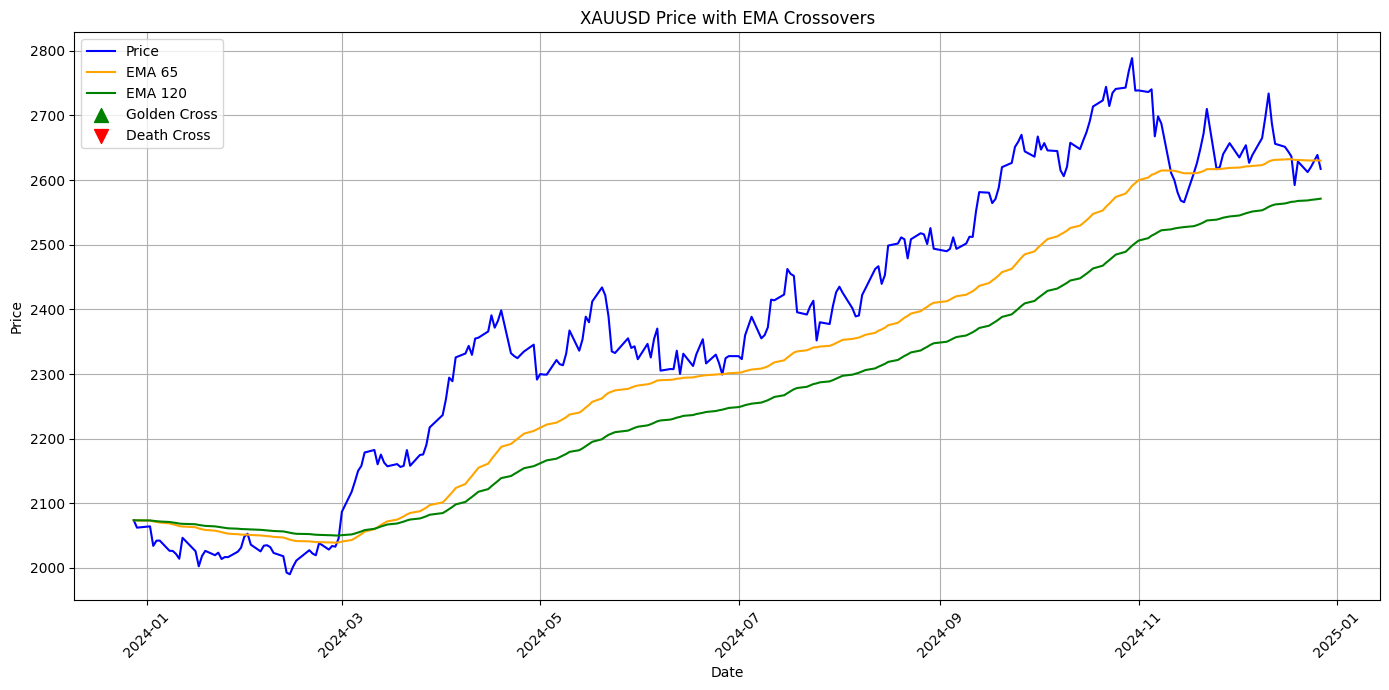

In [1]:


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for XAUUSD (Gold price in USD)
data = yf.download("GC=F", period="1y")  # Get data for the past year

# Calculate EMAs
data['EMA_65'] = data['Close'].ewm(span=65, adjust=False).mean()
data['EMA_120'] = data['Close'].ewm(span=120, adjust=False).mean()

# Identify crossover points
data['Crossover'] = 0.0
data['Crossover'][120:] = (data['EMA_65'][120:] > data['EMA_120'][120:]) * 1.0  # Start comparison from 120th data point

data['Signal'] = data['Crossover'].diff()

# Find crossover alerts
golden_cross_indices = data[data['Signal'] == 1].index
death_cross_indices = data[data['Signal'] == -1].index

# Print alerts
print("Golden Cross Alerts (65 EMA crosses above 120 EMA):")
for index in golden_cross_indices:
    print(f"Date: {index.date()}, Price: {data['Close'][index]:.2f}")

print("\nDeath Cross Alerts (65 EMA crosses below 120 EMA):")
for index in death_cross_indices:
    print(f"Date: {index.date()}, Price: {data['Close'][index]:.2f}")

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Price', color='blue')
plt.plot(data['EMA_65'], label='EMA 65', color='orange')
plt.plot(data['EMA_120'], label='EMA 120', color='green')

# Highlight crossover points
plt.scatter(golden_cross_indices, data['Close'][golden_cross_indices], color='green', marker='^', label='Golden Cross', s=100)  # Increased marker size
plt.scatter(death_cross_indices, data['Close'][death_cross_indices], color='red', marker='v', label='Death Cross', s=100)  # Increased marker size

plt.title('XAUUSD Price with EMA Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

[*********************100%***********************]  1 of 1 completed
<ipython-input-18-20682d0cf82e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crossover'][120:] = (data['EMA_65'][120:] > data['EMA_120'][120:]) * 1.0  # Start comparison from 120th data point


Golden Cross Alerts (65 EMA crosses above 120 EMA):

Death Cross Alerts (65 EMA crosses below 120 EMA):


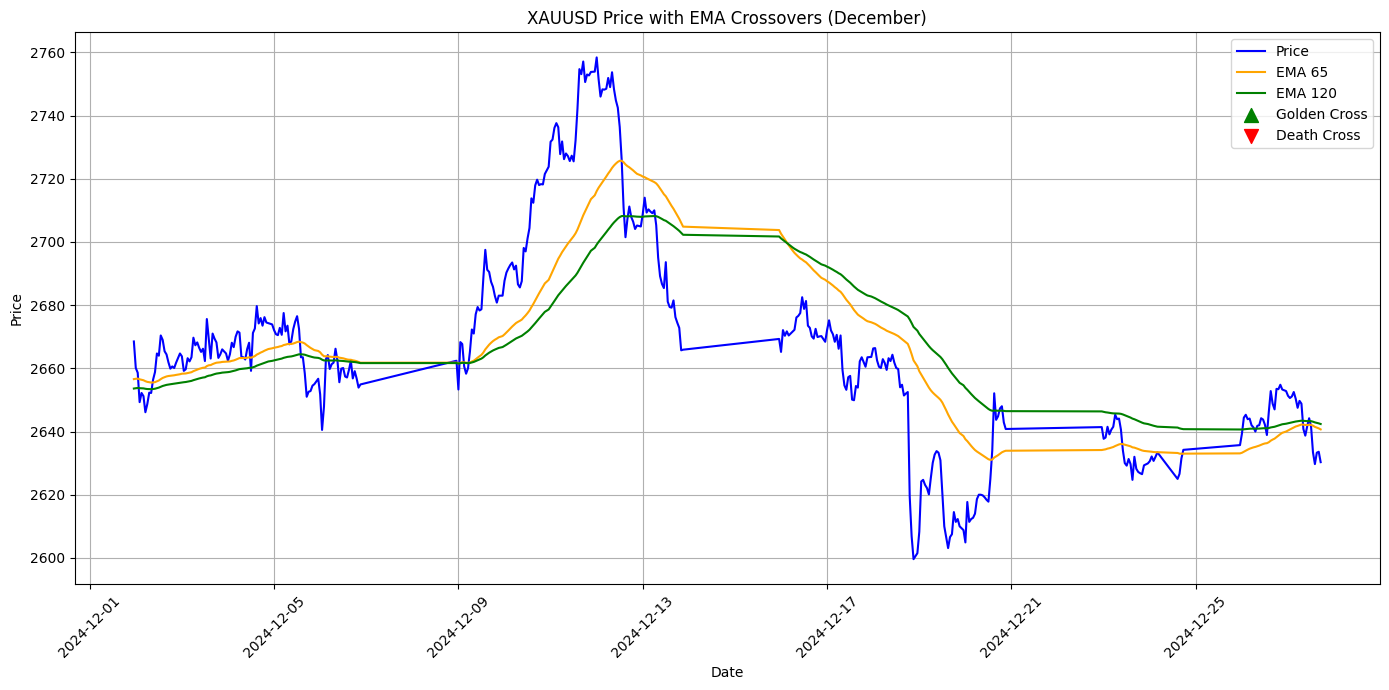

In [ ]:
# Repeat for 6months with 1 hour interval
# Create an alert when the 65 ema crossover 120 ema and also when 65 e

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for XAUUSD (Gold price in USD) with hourly timeframe
data = yf.download("GC=F", period="6mo", interval="1h")

# Calculate EMAs
data['EMA_65'] = data['Close'].ewm(span=65, adjust=False).mean()
data['EMA_120'] = data['Close'].ewm(span=120, adjust=False).mean()

# Identify crossover points
data['Crossover'] = 0.0
data['Crossover'][120:] = (data['EMA_65'][120:] > data['EMA_120'][120:]) * 1.0  # Start comparison from 120th data point
data['Signal'] = data['Crossover'].diff()

# Find crossover alerts
golden_cross_indices = data[data['Signal'] == 1].index
death_cross_indices = data[data['Signal'] == -1].index

# Print alerts
print("Golden Cross Alerts (65 EMA crosses above 120 EMA):")
for index in golden_cross_indices:
    print(f"Date: {index.date()}, Time: {index.time()}, Price: {data['Close'][index]:.2f}")

print("\nDeath Cross Alerts (65 EMA crosses below 120 EMA):")
for index in death_cross_indices:
    print(f"Date: {index.date()}, Time: {index.time()}, Price: {data['Close'][index]:.2f}")


# Filter data for December
december_data = data[(data.index.month == 12)]

# Plotting for December only
plt.figure(figsize=(14, 7))
plt.plot(december_data['Close'], label='Price', color='blue')
plt.plot(december_data['EMA_65'], label='EMA 65', color='orange')
plt.plot(december_data['EMA_120'], label='EMA 120', color='green')

# Highlight crossover points for December
golden_cross_december = golden_cross_indices.intersection(december_data.index)
death_cross_december = death_cross_indices.intersection(december_data.index)

plt.scatter(golden_cross_december, december_data['Close'][golden_cross_december], color='green', marker='^', label='Golden Cross', s=100)
plt.scatter(death_cross_december, december_data['Close'][death_cross_december], color='red', marker='v', label='Death Cross', s=100)

plt.title('XAUUSD Price with EMA Crossovers (December)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()